<center> <h1>Numerical Methods  -- Assignment 1</h1> </center>

## Problem 1 -- isotropic spherical distribution

The area element in a spherical coordinates is:
$$dN = r^2sin\theta d\theta d\phi$$ in this case we take $r=1$.So for a point on the unit sphere with $r=1$, we have its probability density function to be:
$$f(N)dN = \frac{1}{4\pi}dN=f(\theta,\phi)d\theta d\phi,$$
Since $$\iint_Nf(N)dN = 1 \ and \ \iint_N dN = 4\pi$$ 
we have $f(\theta, \phi)=\frac{1}{4\pi}sin\theta$. Marginalising the nuisance to get the pdf for $\theta$ and $\phi$ separately:
$$f(\theta)=\frac{sin\theta}{2},$$
$$f(\phi)=\frac{1}{2\pi}.$$
Since $\phi$ is uniformly distributed, i.e. it does not change with $\phi$.Then we need to apply the transformation method to find the inverse of $F(\theta)$, which is the cdf of $\theta$:
$$F(\theta)=\int_{0}^{\theta}f(\theta)d\theta=\frac{1}{2}(1-cos\theta)$$
we find the inverse function of $\theta$ to be:
$$F^{-1}(x)=arccos(1-2x).$$
This means that we can generate x from a uniform distribution [0,1], and compute $\theta=F^{-1}(x)$, and we take $\theta$ to be drawn from the above-mentioned distribution $f(\theta)$.

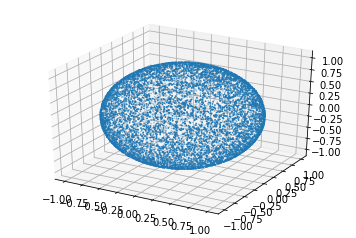

In [1]:
import numpy as np
from math import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#draw random points from a sphere,i.e. dN = 1sin(theta)d(theta)d(phi)
#first generate deviates for x. then we compute theta from x.
size=int(1e4)
X = np.random.uniform(0.,1,size=size)
Theta = np.arccos(1-2*X)
#then generate deviates for phi
Phi = np.random.uniform(low=0.,high=2*pi,size=size)
#set r to be a constant value, 1
R = np.full((size,1),1)
#plot in spherical coordinates: x=r*sin(phi)*sin(theta),y=r*sin(phi)*cos(theta),z=r*cos(phi)
X = np.sin(Theta)*np.sin(Phi)
Y = np.sin(Theta)*np.cos(Phi)
Z = np.cos(Theta)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z,marker='.',s=2)
plt.show()

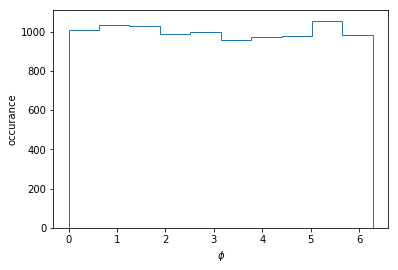

In [2]:
#now checking if phi and theta are indeed uniformly distributed
plt.hist(Phi, histtype='step')
plt.xlabel(r"$\phi$")
plt.ylabel('occurance')
plt.show()

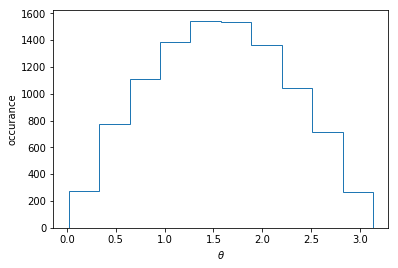

In [3]:
plt.hist(Theta, histtype='step')
plt.xlabel(r"$\theta$")
plt.ylabel('occurance')
plt.show()

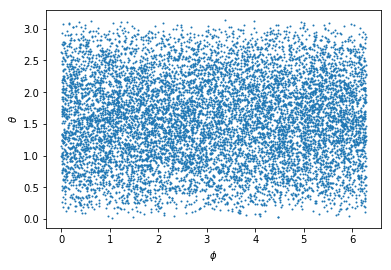

In [4]:
#now plot the 2D distribution
plt.plot(Phi,Theta,'.',markersize=2)
plt.xlabel(r"$\phi$")
plt.ylabel(r"$\theta$")
plt.show()

Last, we check wether the two variables are correlated or not by calculating their Pearson correlation coefficient.

In [5]:
from scipy.stats import pearsonr
print pearsonr(Phi, Theta)

(0.0096991231618785718, 0.33213927334327276)


This suggests that $\phi$ and $\theta$ have almost zero correlation.

## Problem 2 -- Gaia measurements

The location and scale parameters for the measurements are given to be $\mu_l,\sigma_l = (26.8,1.3)$ and $\mu_b,\sigma_b=(36.6,0.6)$mas. 

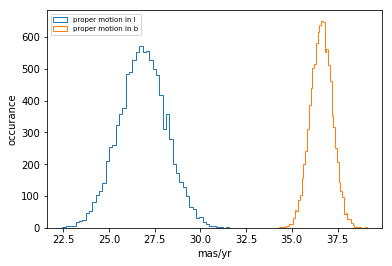

In [6]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

#location parameters in mas/yr
l_mu = 26.8
b_mu = 36.6
#scale parameters in mas/yr
l_sig = 1.3
b_sig = 0.6
#now we draw samples from Gaussian distribution given the location and scale
size = int(1e4)
L_pm = np.random.normal(l_mu,l_sig,size=size)
B_pm = np.random.normal(b_mu,b_sig,size=size)
#plot the samples
plt.hist(L_pm,bins=50,histtype='step',label="proper motion in l")
plt.hist(B_pm,bins=50,histtype='step',label=r"proper motion in b")
plt.xlabel('mas/yr')
plt.ylabel('occurance')
plt.legend(loc=2,fontsize=7)
plt.show()

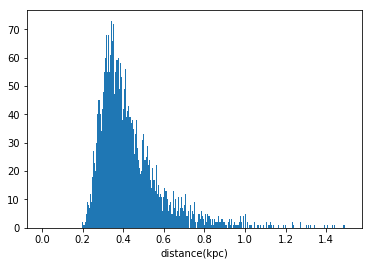

In [7]:
#now we move on to generate 1e4 realisations for trigonometric parallax
angle_loc = 2.5
angle_scl = 0.75
Angle = np.random.normal(angle_loc,angle_scl,size=size)
#we want to check wether d=1/angle still follows a normal distribution
D = np.divide(1.,Angle)
bins=1001
plt.hist(D,range=(0.,1.5),bins=bins)
plt.xlabel('distance(kpc)')
plt.show()

As shown above, the distribution is no longer symmetrical, but rather, skewed. This suggests that the mean and median are no longer equal. And we can prove this by the numerical solutions.

In [8]:
print "The median is found to be:",np.median(D)
print "The mean is found to be:",np.mean(D)

The median is found to be: 0.397966461984
The mean is found to be: 0.389578623465


Now we want to express distance from the histogram we just obtained, taking the form of $Q50_{-Q15.7}^{+Q84.3}$.

Little program to calculate percentile.

In [9]:
#first, calculate Q50, Q15.7 AND Q84.3 separately
hist,bin_edges = np.histogram(D,range=(0.,1.5),bins=1000)
percent = [0.157,0.5,0.843]
value = np.array([])
for num in percent:
    i = 0
    his = np.array([])
    while sum(his) < sum(hist)*num:
        his = np.append(his,hist[i])
        i+=1
    q = len(his)
    print "The percentile asked is:", (sum(his)-his[-1]*0.5)/sum(hist)
    Q = (bin_edges[q]+bin_edges[q-1])/2.
    value = np.append(value,Q)
print value

The percentile asked is: 0.155368654311
The percentile asked is: 0.498791297341
The percentile asked is: 0.842919016922
[ 0.30675  0.39675  0.56175]


In [19]:
#using numpy to calculate percentile
Q = [15.7,50,84.3]
for q in Q:
    print "The pencentile value is:",np.percentile(D,q)

The pencentile value is: 0.307563442677
The pencentile value is: 0.397966461984
The pencentile value is: 0.567727570236


Thus, the distance is determined to be $0.398_{-0.307}^{+0.567}$ kpc

Now we want to get the azimuthal velocity with respect to the Sun. This could be calculated from the formula:
$$v_{\phi}=V_{y}^{\odot}-4.74d\mu_1,$$
where $V_{y}^{\odot}=220$km/s

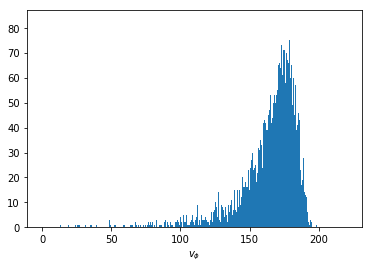

In [10]:
v_phi = 220-4.74*D*L_pm
plt.hist(v_phi,range=(0.,220),bins=bins)
plt.xlabel(r'$v_{\phi}$')
plt.show()

Little program to calculate percentile.

In [20]:
hist,bin_edges = np.histogram(v_phi,range=(30.,200),bins=1000)
percent = [0.157,0.5,0.843]
value = np.array([])
for num in percent:
    i = 0
    his = np.array([])
    while sum(his) < sum(hist)*num:
        his = np.append(his,hist[i])
        i+=1
    q = len(his)
    print "The percentile asked is:", (sum(his)-his[-1]*0.5)/sum(hist)
    Q = (bin_edges[q]+bin_edges[q-1])/2.
    value = np.append(value,Q)
print value

The percentile asked is: 0.157433521354
The percentile asked is: 0.500553988719
The percentile asked is: 0.842113215149
[ 148.235  169.655  181.215]


In [21]:
#using numpy to calculate percentile
Q = [15.7,50,84.3]
for q in Q:
    print "The pencentile value is:",np.percentile(v_phi,q)

The pencentile value is: 147.435922359
The pencentile value is: 169.524429603
The pencentile value is: 181.214786411


Thus the azimuthal velocity expressed as $Q50_{-Q15.7}^{+Q84.3}$ is $169.524_{-147.435}^{+181.214}$ km/s.

## Problem 3 -- randu

randu generate a sequence of pseudo random numbers according to the algorithm below:
$$I_{j+1} = aI_{j} \ mod \ m,$$
with $I_0$ the non-zero seed. 

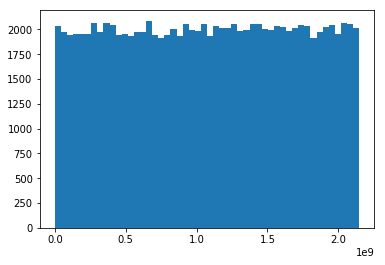

In [12]:
import numpy as np
from math import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

I0 = 1
I = np.array([I0])
a = 65539; m = 2**31
i = 0
ran = I0
while i<1e5-1:
    ran = (a*ran) % m
    I = np.append(I,ran)
    i+=1
plt.hist(I,bins=50)
plt.show()


At this stage it is very hard to perceive any patterns. To make the flaws more perceivable we use the scatter plot.

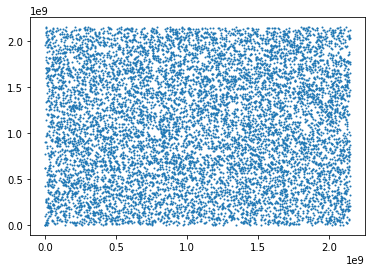

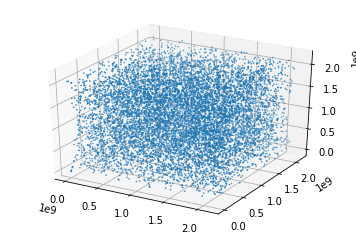

In [13]:
a = 65539; m = 2**31
I0 = 1
I = np.array([I0])
i = 0
ran = I0
while i<1e4-1:
    ran = (a*ran) % m
    I = np.append(I,ran)
    i+=1
seeds = [I[1], I[2]]
I1 = np.array([seeds[0]])
i = 0
ran = seeds[0]
while i<1e4-1:
    ran = (a*ran) % m
    I1 = np.append(I1,ran)
    i+=1
I2 = np.array([seeds[1]])
i = 0
ran = seeds[1]
while i<1e4-1:
    ran = (a*ran) % m
    I2 = np.append(I2,ran)
    i+=1
#print len(I),len(I1),len(I2)
plt.plot(I,I1,'.',markersize=2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(I, I1, I2,marker='.',s=2)
plt.show()

Doesn't seem to be wrong at first sight, but wait.

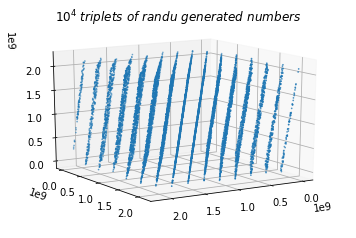

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(I, I1, I2,marker='.',s=2)
ax.view_init(elev=15, azim=58)
plt.title(r'$10^4 \ triplets \ of \ randu \ generated \ numbers$')
plt.show()

Now we can see that rather than filling the box roughly evenly, triplets of numbers all lie in one of 15 planes, suggesting a pattern could be found for this so-called random number generator. It turns out it is not so random after all.

## Problem 4 -- rejection method

$$p(\theta) = \frac{2}{\pi}sin^2\theta,$$
for $\theta \in [0,\pi]$.
To apply the rejection method, we want to find a comparison function $f(\theta)\geq p(\theta)$ for all $\theta$.

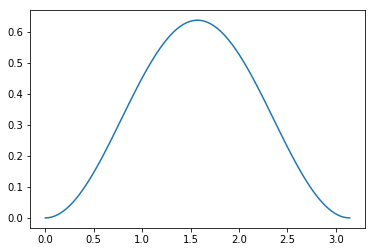

In [15]:
#first we need to plot out p(theta)
def p(x):
    return 2/pi*(np.sin(x))**2
Theta = np.linspace(0.,pi,100)
Y = p(Theta)
plt.plot(Theta,Y,'-')
plt.show()

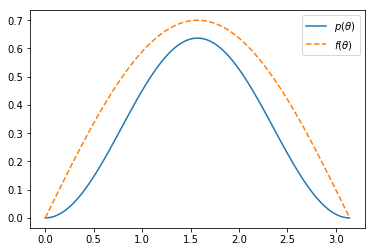

In [16]:
#now define a comparison function, one which we can easily find its cdf.
def f(x):
    return 0.7*np.sin(x)
Z = f(Theta)
plt.plot(Theta,Y,'-',label=r'$p(\theta)$')
plt.plot(Theta,Z,'--',label=r'$f(\theta)$')
plt.legend()
plt.show()

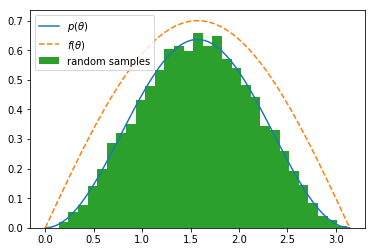

In [17]:
def inverse(x):
    y = np.arccos(1.-2*x)
    return y
#the rejection steps
X1 = np.array([])
Y1 = np.array([])
i=0
while i < 10000:
    #first, draw random samples from a uniform distribution [0,1]
    y0 = np.random.uniform(low=0,high=1)
    #compute X0 from the inverse cdf function
    x0 = inverse(y0)
    y1 = np.random.uniform(0.,f(x0))
    if y1 <= p(x0):
        X1 = np.append(X1, x0)
        i+=1

plt.plot(Theta,Y,'-',label=r'$p(\theta)$')
plt.plot(Theta,Z,'--',label=r'$f(\theta)$')
plt.hist(X1,bins=30,normed=True,label='random samples')
plt.legend()
plt.show()